# Lecture 23 LIVE

![Titanic](titanic.jpeg)

## Topics for Today
- Entropy and Decision Trees for the Titanic Dataset
    - [An Extensive Kaggle notebook](https://www.kaggle.com/vaishvik25/titanic-eda-fe-3-model-decision-tree-viz)
    - Instead of Graphviz I used plotting instructions [here](https://mljar.com/blog/visualize-decision-tree/)
    - [A Simpler Take on Decision Trees with the Titanic Dataset](https://benalexkeen.com/decision-tree-classifier-in-python-using-scikit-learn/)
    - [A Good Overview of Entropy](https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8)

In [1]:
import numpy as np 
import pandas as pd

from sklearn import preprocessing
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

#training data set
titanic_df = pd.read_csv("train.csv")

#cross validation data (hold-out testing)
test_df    = pd.read_csv("test.csv")
test_survival = pd.read_csv("test_survival.csv")

In [2]:
titanic_df.head(20)
#test_df.head(10)
#test_survival.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Age Missing Values

Count of missing Values : 177 , The Proportion of this values with dataset is 19.869999999999997

visualization AGE


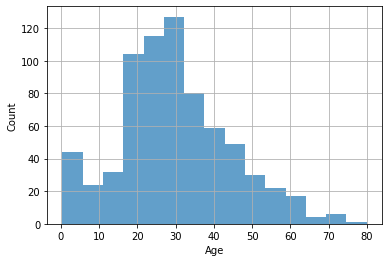

In [4]:
a=sum(pd.isnull(titanic_df['Age'])) # COUNT Missing Values in age
b=round(a/(len(titanic_df["PassengerId"])),4) # proportion of "Age" missing in percent

print("Count of missing Values : {} , The Proportion of this values with dataset is {}\n".format(a,b*100))

print("visualization AGE")
ax = titanic_df["Age"].hist(bins=15, alpha=0.7)
ax.set(xlabel='Age', ylabel='Count')
plt.show()

In [5]:
m1=titanic_df["Age"].median(skipna=True)
m2=titanic_df["Age"].mean(skipna=True)

print("Median: {} and Mean: {} | Median age is 28 as compared to mean which is ~30".format(m1,m2))

Median: 28.0 and Mean: 29.69911764705882 | Median age is 28 as compared to mean which is ~30


### Embarked Missing Data

In [6]:
# proportion of "Embarked" missing
a=round(2/len(titanic_df["PassengerId"]),4)

print('proportion of "Embarked" missing is {}'.format(a*100))

proportion of "Embarked" missing is 0.22


## Pre-Processing the Data

In [7]:
train_data = titanic_df
train_data["Age"].fillna(28, inplace=True)
train_data["Embarked"].fillna("S", inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

> According to the Kaggle data dictionary, both SibSp and Parch relate to traveling with family. For simplicity's sake (and to account for possible multicollinearity), we will combine the effect of these variables into one categorical predictor: whether or not that individual was traveling alone.

In [8]:
train_data['TravelBuds']=train_data["SibSp"]+train_data["Parch"]
train_data['TravelAlone']=np.where(train_data['TravelBuds']>0, 0, 1)

train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)
train_data.drop('TravelBuds', axis=1, inplace=True)

#create categorical variable for Pclass || ONE HOT ENCODING
train2 = pd.get_dummies(train_data, columns=["Pclass"])

train3 = pd.get_dummies(train2, columns=["Embarked"])

train4=pd.get_dummies(train3, columns=["Sex"])
train4.drop('Sex_female', axis=1, inplace=True)

#Drop Unwanted
train4.drop('PassengerId', axis=1, inplace=True)
train4.drop('Name', axis=1, inplace=True)
train4.drop('Ticket', axis=1, inplace=True)
train4.head(5)
df_final = train4

df_final['IsMinor']=np.where(train_data['Age']<=16, 1, 0)

In [9]:
df_final.head(15)

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,7.2500,0,0,0,1,0,0,1,1,0
1,1,38.0,71.2833,0,1,0,0,1,0,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1,0
5,0,28.0,8.4583,1,0,0,1,0,1,0,1,0
6,0,54.0,51.8625,1,1,0,0,0,0,1,1,0
7,0,2.0,21.0750,0,0,0,1,0,0,1,1,1
8,1,27.0,11.1333,0,0,0,1,0,0,1,0,0
9,1,14.0,30.0708,0,0,1,0,1,0,0,0,1


### Pre-Processing the Testing Data

In [10]:
## Do the same thing to the test data!

test_df["Age"].fillna(28, inplace=True)
test_df["Fare"].fillna(14.45, inplace=True)
test_df.drop("Cabin", axis=1, inplace=True)

test_df['TravelBuds']=test_df["SibSp"]+test_df["Parch"]
test_df['TravelAlone']=np.where(test_df['TravelBuds']>0, 0, 1)

test_df.drop('SibSp', axis=1, inplace=True)
test_df.drop('Parch', axis=1, inplace=True)
test_df.drop('TravelBuds', axis=1, inplace=True)

test2 = pd.get_dummies(test_df, columns=["Pclass"])
test3 = pd.get_dummies(test2, columns=["Embarked"])

test4=pd.get_dummies(test3, columns=["Sex"])
test4.drop('Sex_female', axis=1, inplace=True)

test4.drop('PassengerId', axis=1, inplace=True)
test4.drop('Name', axis=1, inplace=True)
test4.drop('Ticket', axis=1, inplace=True)
final_test = test4

final_test['IsMinor']=np.where(final_test['Age']<=16, 1, 0)

## Feature Extraction

In [11]:
cols=["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2","Pclass_3","Embarked_C","Embarked_S","Sex_male","IsMinor"]

X = df_final[cols]
y = df_final["Survived"]

X_test = final_test[cols]
y_actual = test_survival["Survived"]

## Decision Tree(s) Instantiation

The default choice in scikit-learn is the use of the Gini impurity
$$ \text{Gini Impurity} = 1 - \sum_{i}p_i^2$$ 
Let's first use the entropy method defined in lecture that maximizes information gain.

In [37]:
from sklearn import tree

entropy_tree = tree.DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=3, min_samples_leaf=20)
#entropy_tree = tree.DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=5, min_samples_leaf=2)

In [38]:
entropy_tree.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### ASCII Tree Visualization

In [39]:
text_representation = tree.export_text(entropy_tree)
print(text_representation)

|--- feature_8 <= 0.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_1 <= 28.86
|   |   |   |--- class: 1
|   |   |--- feature_1 >  28.86
|   |   |   |--- class: 1
|   |--- feature_5 >  0.50
|   |   |--- feature_1 <= 23.35
|   |   |   |--- class: 1
|   |   |--- feature_1 >  23.35
|   |   |   |--- class: 0
|--- feature_8 >  0.50
|   |--- feature_1 <= 26.27
|   |   |--- feature_9 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_9 >  0.50
|   |   |   |--- class: 1
|   |--- feature_1 >  26.27
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: 0



### Matplotlib Visualization

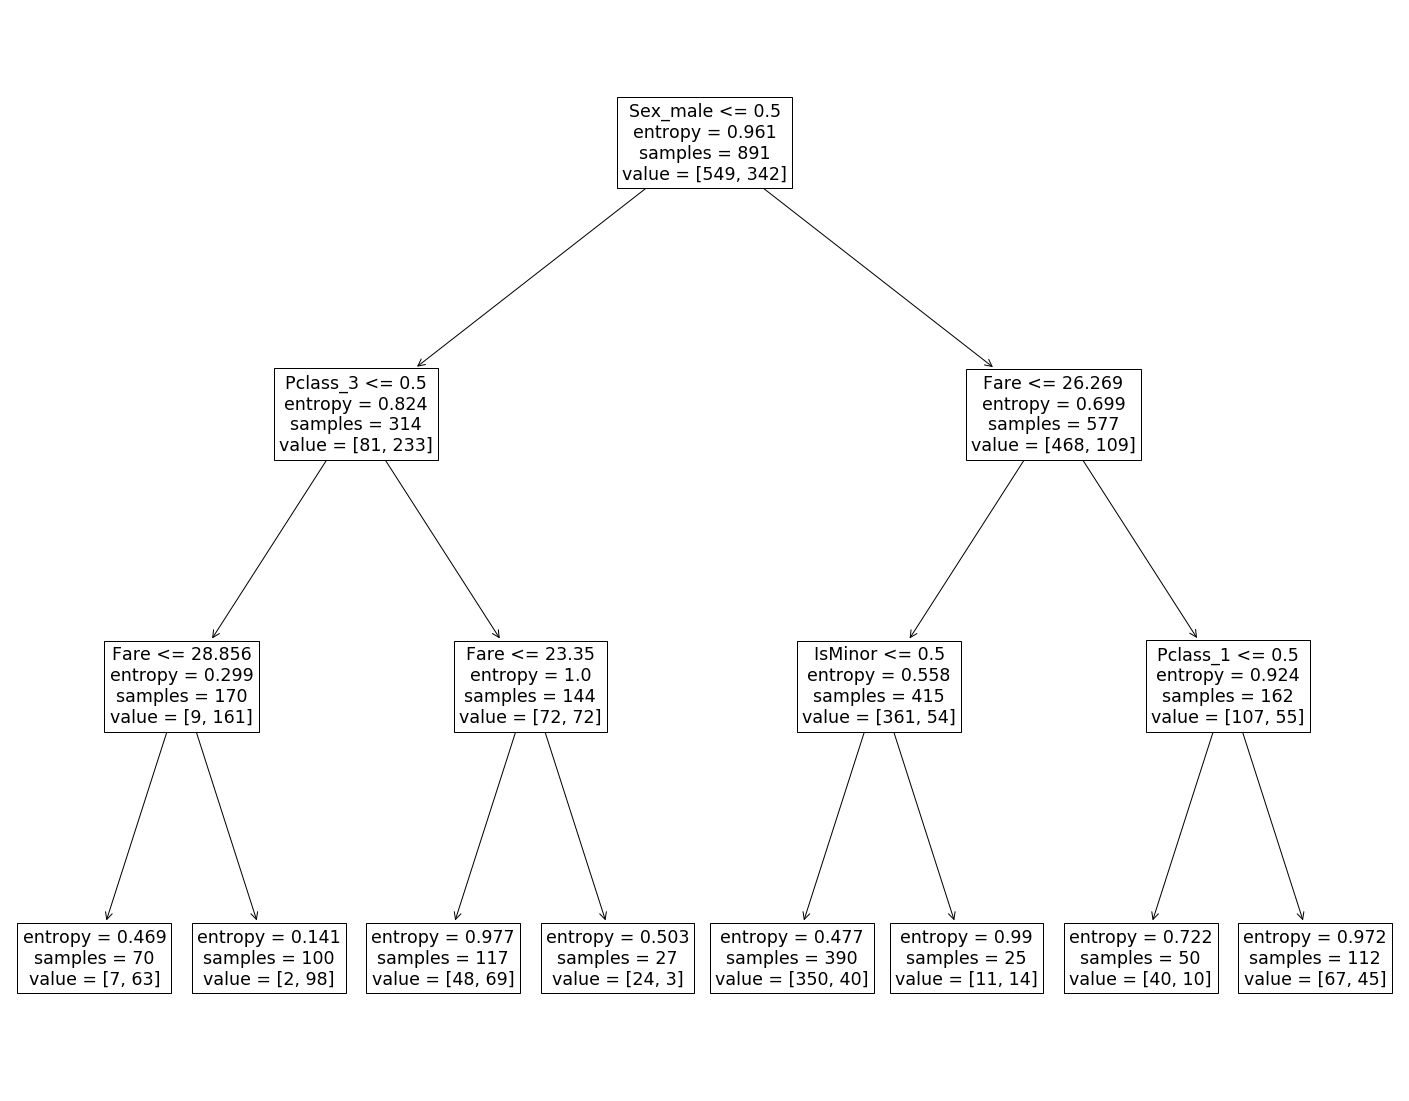

In [40]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(entropy_tree,feature_names=X.columns)
#fig.savefig("entropy_decision_tree.png")

## Interpreting the Results

Let's extract out the samples for the leaf nodes with the lowest entropy.

In [16]:
df_final[(df_final['Sex_male'] == 1) & (df_final['Fare'] <= 26.269) & (df_final['IsMinor'] == 0)]

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,7.2500,0,0,0,1,0,0,1,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1,0
5,0,28.0,8.4583,1,0,0,1,0,1,0,1,0
12,0,20.0,8.0500,1,0,0,1,0,0,1,1,0
17,1,28.0,13.0000,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
881,0,33.0,7.8958,1,0,0,1,0,0,1,1,0
883,0,28.0,10.5000,1,0,1,0,0,0,1,1,0
884,0,25.0,7.0500,1,0,0,1,0,0,1,1,0
886,0,27.0,13.0000,1,0,1,0,0,0,1,1,0


In [20]:
df_final[(df_final['Sex_male'] == 0) & (df_final['Pclass_3'] == 0) & (df_final['Fare'] >= 29)]

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
1,1,38.0,71.2833,0,1,0,0,1,0,0,0,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0,0
9,1,14.0,30.0708,0,0,1,0,1,0,0,0,1
31,1,28.0,146.5208,0,1,0,0,1,0,0,0,0
43,1,3.0,41.5792,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
853,1,16.0,39.4000,0,1,0,0,0,0,1,0,1
856,1,45.0,164.8667,0,1,0,0,0,0,1,0,0
871,1,47.0,52.5542,0,1,0,0,0,0,1,0,0
879,1,56.0,83.1583,0,1,0,0,1,0,0,0,0


In [ ]:
print("visualization fare")
ax = titanic_df["Fare"].hist(alpha=0.7)
ax.set(xlabel='Fare', ylabel='Count')
plt.show()

### Accuracy

In [35]:
y_predict = entropy_tree.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_actual, y_predict)

0.9593301435406698

### Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_actual, y_predict)

array([[255,  11],
       [  6, 146]])

## Re-Run with Gini Coefficient


In [23]:
#gini_tree = tree.DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3, min_samples_leaf=20)
gini_tree = tree.DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=5, min_samples_leaf=2)

gini_tree.fit(X,y)

y_gini_predict = gini_tree.predict(X_test)

accuracy_score(y_actual, y_gini_predict)

0.9449760765550239

In [24]:
confusion_matrix(y_actual, y_gini_predict)

array([[259,   7],
       [ 16, 136]])